In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
digits.data.shape

(1797, 64)

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

<Figure size 432x288 with 0 Axes>

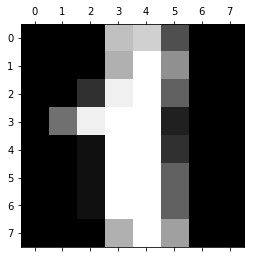

In [12]:
plt.gray()
plt.matshow(digits.images[1])
plt.show()

In [13]:
images_and_labels = list(zip(digits.images, digits.target))

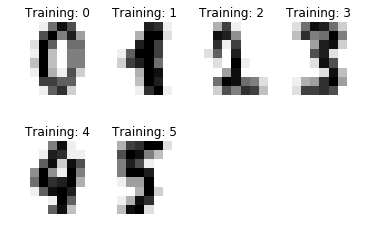

In [18]:
for index, (image, label) in enumerate(images_and_labels[10:16]):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [19]:
n_samples = len(digits.images)
data = digits.images.reshape(n_samples, -1)

In [20]:
from sklearn import svm, metrics

/home/user/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [21]:
classifier = svm.SVC(gamma=0.001)

In [24]:
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2 ])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

In [27]:
type(expected), type(predicted)

(numpy.ndarray, numpy.ndarray)

In [28]:
metrics.classification_report(expected, predicted)

'             precision    recall  f1-score   support\n\n          0       1.00      0.99      0.99        88\n          1       0.99      0.97      0.98        91\n          2       0.99      0.99      0.99        86\n          3       0.98      0.87      0.92        91\n          4       0.99      0.96      0.97        92\n          5       0.95      0.97      0.96        91\n          6       0.99      0.99      0.99        91\n          7       0.96      0.99      0.97        89\n          8       0.94      1.00      0.97        88\n          9       0.93      0.98      0.95        92\n\navg / total       0.97      0.97      0.97       899\n'

In [29]:
metrics.confusion_matrix(expected, predicted)

array([[87,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 88,  1,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 85,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 79,  0,  3,  0,  4,  5,  0],
       [ 0,  0,  0,  0, 88,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 88,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 88,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 88,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 90]])

In [30]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))

In [44]:
images_and_predictions[:4]

[(array([[ 0.,  0.,  1., 11., 14., 15.,  3.,  0.],
         [ 0.,  1., 13., 16., 12., 16.,  8.,  0.],
         [ 0.,  8., 16.,  4.,  6., 16.,  5.,  0.],
         [ 0.,  5., 15., 11., 13., 14.,  0.,  0.],
         [ 0.,  0.,  2., 12., 16., 13.,  0.,  0.],
         [ 0.,  0.,  0., 13., 16., 16.,  6.,  0.],
         [ 0.,  0.,  0., 16., 16., 16.,  7.,  0.],
         [ 0.,  0.,  0., 11., 13., 12.,  1.,  0.]]), 8),
 (array([[ 0.,  0.,  6., 14., 16.,  5.,  0.,  0.],
         [ 0.,  2., 16., 16., 16.,  7.,  0.,  0.],
         [ 0.,  2., 15., 16., 15.,  2.,  0.,  0.],
         [ 0.,  0.,  6., 16., 15.,  7.,  0.,  0.],
         [ 0.,  0., 14., 10.,  6., 16.,  3.,  0.],
         [ 0.,  1., 16.,  3.,  0., 16.,  7.,  0.],
         [ 0.,  0., 10., 11., 11., 15.,  3.,  0.],
         [ 0.,  0.,  3., 14., 16.,  6.,  0.,  0.]]), 8),
 (array([[ 0.,  0.,  0.,  4., 15.,  6.,  0.,  0.],
         [ 0.,  0.,  0., 13., 13.,  1.,  0.,  0.],
         [ 0.,  0.,  7., 16.,  2.,  0.,  0.,  0.],
         [ 0.,  4.,

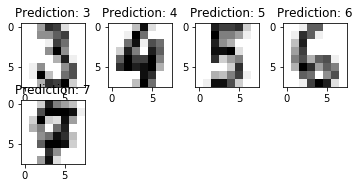

In [61]:
for index, (image, prediction) in enumerate(images_and_predictions[10:15]):
    plt.subplot(3, 4, index+5)
    plt.axis('on')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)